In [ ]:
# 🦠 COVID-19 Data Analysis  
# Dataset: `covid_19_data.csv`
#This project analyzes global COVID-19 trends, including confirmed cases, deaths, recoveries, and country comparisons.

In [ ]:
### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [ ]:
### 📌 Step 1 — Load & Inspect Data

In [26]:
covid_df = pd.read_csv("C:/Users/ASWIN/Documents/python/projects/covid_19_data.csv")

covid_df.shape
covid_df.info()
covid_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
### 📌 Step 2 — Find Missing Values

In [5]:
def missing_values(df):
    missing = df.isna().sum()
    return missing[missing > 0]

missing_values(covid_df)

Province/State    78103
dtype: int64

In [ ]:
### 📌 Step 3 — Standardize Country Names

In [29]:
cc = coco.CountryConverter()

mapping_country = {
    'Others': 'Unknown',
    'North Ireland': 'Ireland',
    'Channel Islands': 'United Kingdom',
    'Diamond Princess': 'Japan',
    'MS Zaandam': 'Netherlands'
}

covid_df['Country/Region'] = covid_df['Country/Region'].replace(mapping_country)

unique_countries = covid_df['Country/Region'].unique()
converted = cc.convert(names=unique_countries, to='name_short', not_found='Unknown')

country_map = dict(zip(unique_countries, converted))
covid_df['Country/Region'] = covid_df['Country/Region'].map(country_map)


Unknown not found in regex


In [ ]:
### 📌 Step 4 — Compare Total Confirmed Cases Between Two Countries

In [30]:
def compare_country_conf_cases(df, c1, c2):
    df = df.copy()
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

    country1 = df[df['Country/Region'].str.lower() == c1.lower()]
    country2 = df[df['Country/Region'].str.lower() == c2.lower()]

    tot1 = country1.groupby('ObservationDate')['Confirmed'].sum().iloc[-1]
    tot2 = country2.groupby('ObservationDate')['Confirmed'].sum().iloc[-1]

    print(f"{c1}: {tot1}")
    print(f"{c2}: {tot2}\n")

    if tot1 > tot2:
        print(f"{c1} had more total infections.")
    else:
        print(f"{c2} had more total infections.")

# Example:
compare_country_conf_cases(covid_df, "India", "United States")


India: 27894800.0
United States: 33251939.0

United States had more total infections.


In [ ]:
### 📌 Step 5 — COVID-19 Cases Over Time (Country Level)

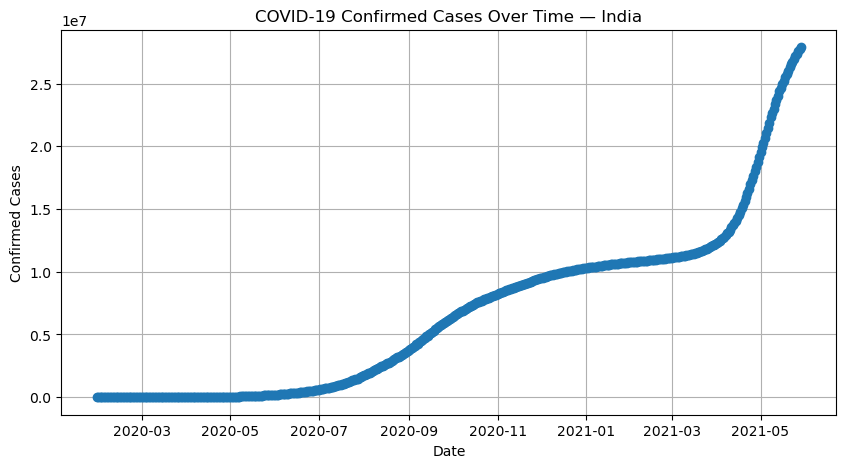

In [31]:
def covid_over_time(df, country):
    df = df.copy()
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

    data = df[df['Country/Region'].str.lower() == country.lower()]
    grouped = data.groupby('ObservationDate')['Confirmed'].sum()

    plt.figure(figsize=(10,5))
    plt.plot(grouped.index, grouped.values, marker='o')
    plt.title(f"COVID-19 Confirmed Cases Over Time — {country}")
    plt.xlabel("Date")
    plt.ylabel("Confirmed Cases")
    plt.grid(True)
    plt.show()

covid_over_time(covid_df, "India")


In [ ]:
### 📌 Step 6 — Top 10 Countries by Deaths

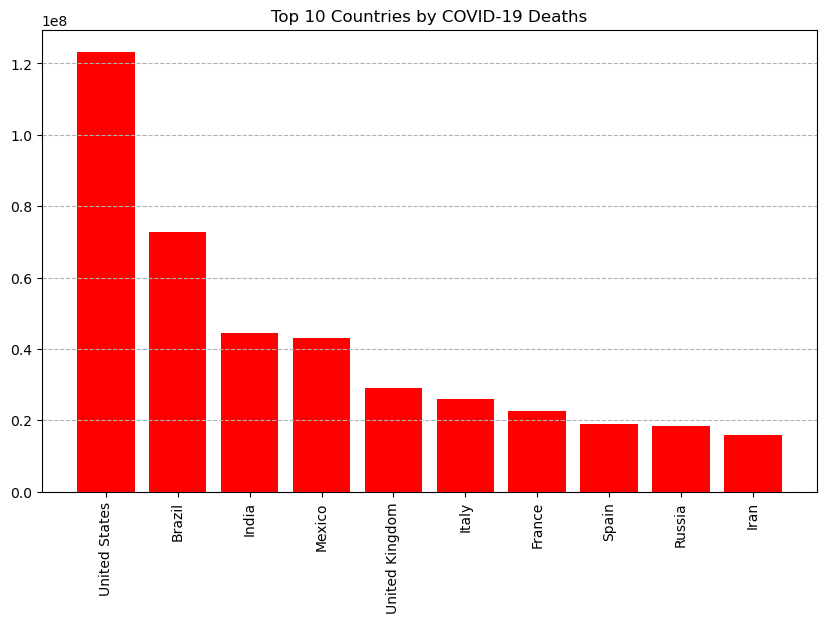

In [32]:
def top_deaths(df):
    deaths = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,6))
    plt.bar(deaths.index, deaths.values, color='red')
    plt.title("Top 10 Countries by COVID-19 Deaths")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--')
    plt.show()

top_deaths(covid_df)

In [ ]:
### 📌 Step 7 — Recovery Rate by country

In [38]:
def recovery_rate(df):
    rates = {}
    for country in df['Country/Region'].unique():
        data = df[df['Country/Region'] == country]
        rec = data['Recovered'].sum()
        conf = data['Confirmed'].sum()
        rates[country] = (rec / conf * 100) if conf else 0
    return rates

recovery_rate(covid_df)

{'China': np.float64(90.38484715670704),
 'Hong Kong': np.float64(91.6279201109967),
 'Macau': np.float64(92.84154331472944),
 'Taiwan': np.float64(77.25399286300559),
 'United States': np.float64(8.32135616680629),
 'Japan': np.float64(87.66728838377651),
 'Thailand': np.float64(57.55565540989521),
 'South Korea': np.float64(86.87864598894913),
 'Kiribati': np.float64(0.0),
 'Singapore': np.float64(93.75643928806286),
 'Philippines': np.float64(86.88035725576452),
 'Malaysia': np.float64(88.54932848415237),
 'Vietnam': np.float64(78.95821969401803),
 'Australia': np.float64(76.42212629498071),
 'Mexico': np.float64(78.56866855847858),
 'Brazil': np.float64(87.19052954250758),
 'Colombia': np.float64(90.96458561434349),
 'France': np.float64(8.116034710934446),
 'Nepal': np.float64(88.97431850673469),
 'Canada': np.float64(88.67136277812156),
 'Cambodia': np.float64(56.3547898788682),
 'Sri Lanka': np.float64(87.44027098227247),
 "Côte d'Ivoire": np.float64(92.35165460323608),
 'German

In [ ]:
### 📌 Step 8 — Daily New Confirmed Cases (Global)

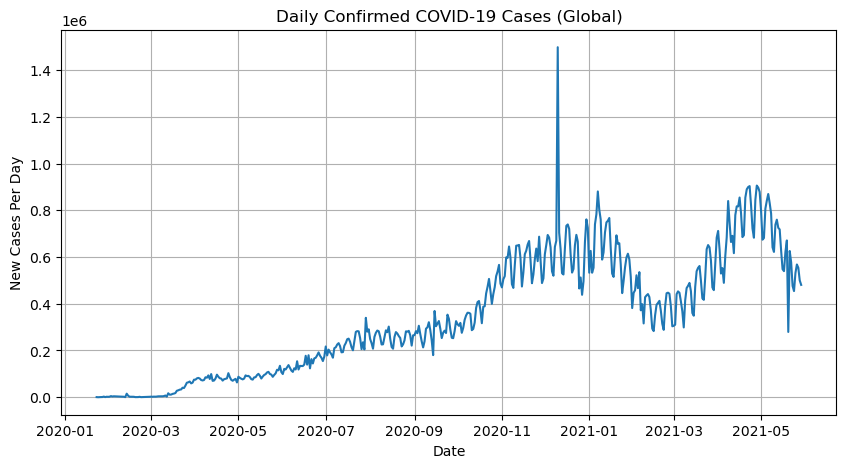

In [40]:
def daily_cases(df):
    df = df.copy()
    df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
    df['Confirmed'] = pd.to_numeric(df['Confirmed'], errors='coerce')

    daily = df.resample('D', on='ObservationDate')['Confirmed'].sum().diff().clip(lower=0)

    plt.figure(figsize=(10,5))
    plt.plot(daily.index, daily.values)
    plt.title("Daily Confirmed COVID-19 Cases (Global)")
    plt.xlabel("Date")
    plt.ylabel("New Cases Per Day")
    plt.grid(True)
    plt.show()

daily_cases(covid_df)

In [ ]:
## 📌 step 9 - Active cases (global)

In [41]:
def active_cases(df):
    return df['Confirmed'].sum() - df['Recovered'].sum() - df['Deaths'].sum()

active_cases(covid_df)


np.float64(10177800829.0)

In [ ]:
# 📌 Step 10 — Predict COVID-19 Cases for the Next 14 Days (Machine Learning)

In this section, we use a simple Linear Regression model to forecast future confirmed cases.
This demonstrates:

- Feature creation  
- Model training  
- Prediction  
- Visualization of future trends  

In [43]:
# Ensure date format
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'])

# Aggregate worldwide confirmed cases by date
daily_confirmed = covid_df.groupby('ObservationDate')['Confirmed'].sum().reset_index()

# Create numerical "Day" feature
daily_confirmed['Day'] = (daily_confirmed['ObservationDate'] - daily_confirmed['ObservationDate'].min()).dt.days

# X (feature) and y (target)
X = daily_confirmed[['Day']]
y = daily_confirmed['Confirmed']

# Train simple ML model
model = LinearRegression()
model.fit(X, y)

print("Model trained successfully!")


Model trained successfully!


In [44]:
## 🔮 Predict Next 14 Days

In [45]:
# Last day number
last_day = daily_confirmed['Day'].max()

# Generate next 14 days
future_days = np.arange(last_day + 1, last_day + 15).reshape(-1, 1)

# Forecast future confirmed cases
future_predictions = model.predict(future_days)

# Create dataframe for visualization
future_df = pd.DataFrame({
    "Day_Number": future_days.flatten(),
    "Predicted_Confirmed": future_predictions
})

future_df

C:\Users\ASWIN\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Day_Number,Predicted_Confirmed
0,494,1.406328e+08
1,495,1.409863e+08
2,496,1.413398e+08
3,497,1.416933e+08
4,498,1.420468e+08
5,499,1.424003e+08
6,500,1.427538e+08
7,501,1.431073e+08
8,502,1.434608e+08
9,503,1.438143e+08


In [ ]:
## 📈 Plot Actual vs Forecasted Cases

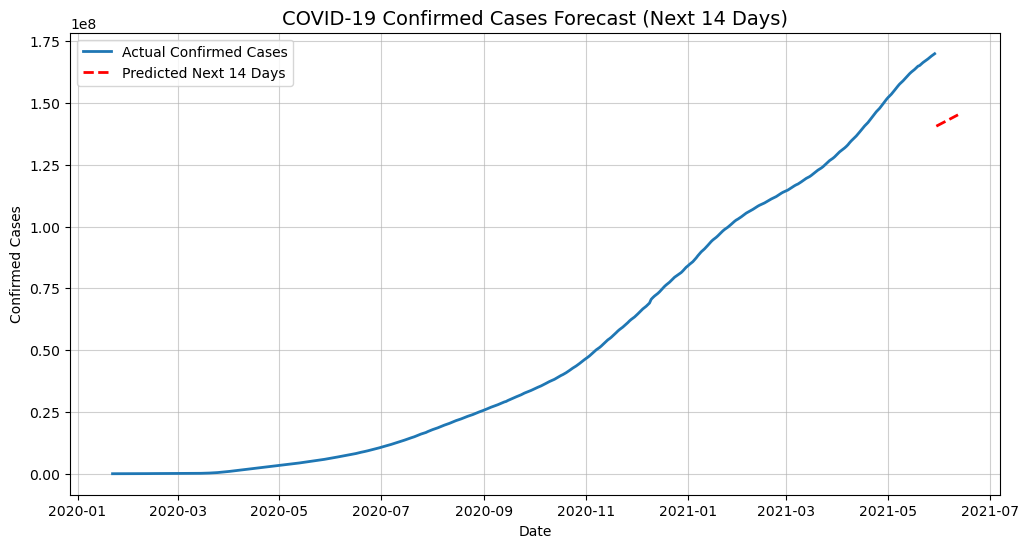

In [48]:
plt.figure(figsize=(12,6))

# Actual case trend
plt.plot(daily_confirmed['ObservationDate'], daily_confirmed['Confirmed'],
         label="Actual Confirmed Cases", linewidth=2)

# Future date range
future_dates = daily_confirmed['ObservationDate'].max() + \
               pd.to_timedelta(future_df['Day_Number'] - last_day, unit='D')

# Forecast line


plt.plot(future_dates, future_df['Predicted_Confirmed'],
         label="Predicted Next 14 Days", linestyle='--', color='red', linewidth=2)

plt.title("COVID-19 Confirmed Cases Forecast (Next 14 Days)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True, alpha=0.6)
plt.legend()
plt.show()
